In [19]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO
import torch

In [18]:
!pip install roboflow

  Using cached roboflow-1.1.7-py3-none-any.whl.metadata (9.0 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached supervision-0.16.0-py3-none-any.whl.metadata (14 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
Using cached roboflow-1.1.7-py3-none-any.whl (58 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl (38.0 MB)
Using cached supervision-0.16.0-py3-none-any.whl (72 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Projects\\Distance_project\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [2]:
def distance(point, rectangle):
    image = np.zeros((100, 100), dtype='uint8')
    (x0, y0) = point
    (x1,y1) = rectangle[:2]
    (x2,y2) = rectangle[2:]
    
    #minimum distance is in some corner point
    if x0>=x2 and y0<=y1:
        d=np.sqrt((x2-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x2,y1]
    if x0<=x1 and y0<=y1:
        d=np.sqrt((x1-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x1,y1]  
    if x0<=x1 and y0>=y2:
        d=np.sqrt((x1-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x1,y2]    
    if x0>=x2 and y0>=y2:
        d=np.sqrt((x2-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x2,y2]     
     #minimum distance is on the edge: draw perpendicular to that edge from (x0,y0)
    if x0>=x1 and x0<=x2 and y0>=y2:
        d=y0-y2
        d_coord = [x0,y0, x0,y2] 
    if x0>=x1 and x0<=x2 and y0<=y1:
        d=y1-y0
        d_coord = [x0,y0, x0,y1]  
    if y0>=y1 and y0<=y2 and x0>=x2:
        d=x0-x2
        d_coord = [x0,y0, x2,y0] 
    if y0>=y1 and y0<=y2 and x0<=x1:
        d=x1-x0
        d_coord = [x0,y0, x1,y0]   
    # point is inside rectangle  - distance is the distance between two centers  
    if x0>=x1 and x0<=x2 and y0>=y1 and y0<=y2:
        center_x = int((x1+x2)/2)
        center_y = int((y1+y2)/2)
        d=np.sqrt((center_x-x0)**2+(center_y-y0)**2)
        d_coord = [x0,y0, center_x, center_y] 
        print(d_coord)     
        
    #draw distance
    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255,0,0), thickness=1)
    cv2.circle(image, (x0,y0), radius=0, color=(255, 0, 0), thickness=-1)
    cv2.line(image, d_coord[:2], d_coord[2:], color = (255, 255, 255), thickness=1)
    plt.imshow(image)
    plt.axis("off")
    return d

[50, 50, 70, 60]
22.360679774997898


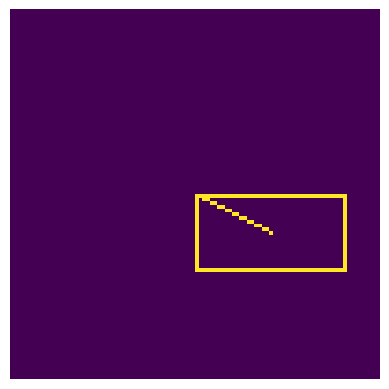

In [4]:
d = distance([50,50], [50, 50, 90, 70])
print(d)

In [8]:
def get_distance(rect1, rect2):
    # take senter of person as a point
    (x0, y0) = int((rect1[0]+rect1[2])/2), int((rect1[1]+rect1[3])/2)
    (x1,y1) = rect2[:2]
    (x2,y2) = rect2[2:]
    
    #d=0
    
    #minimum distance is in some corner point
    if x0>x2 and y0<y1:
        d=np.sqrt((x2-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x2,y1]
    if x0<x1 and y0<y1:
        d=np.sqrt((x1-x0)**2+(y1-y0)**2)
        d_coord = [x0,y0, x1,y1]  
    if x0<x1 and y0>y2:
        d=np.sqrt((x1-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x1,y2]    
    if x0>x2 and y0>y2:
        d=np.sqrt((x2-x0)**2+(y2-y0)**2)
        d_coord = [x0,y0, x2,y2]     
     #minimum distance is on the edge: draw perpendicular to that edge from (x0,y0)
    if x0>=x1 and x0<=x2 and y0>=y2:
        d=y0-y2
        d_coord = [x0,y0, x0,y2] 
    if x0>=x1 and x0<=x2 and y0<=y1:
        d=y1-y0
        d_coord = [x0,y0, x0,y1]  
    if y0>=y1 and y0<=y2 and x0>=x2:
        d=x0-x2
        d_coord = [x0,y0, x2,y0] 
    if y0>=y1 and y0<=y2 and x0<=x1:
        d=x1-x0
        d_coord = [x0,y0, x1,y0]      
    if x0>=x1 and x0<=x2 and y0>=y1 and y0<=y2:
        center_x = int((x1+x2)/2)
        center_y = int((y1+y2)/2)
        d=np.sqrt((center_x-x0)**2+(center_y-y0)**2)
        d_coord = [x0,y0, center_x, center_y] 
        
    
    return d, d_coord

In [16]:
def get_circular_distance(rect1, rect2):
    # take senter of person as a point
    (x0, y0) = int((rect1[0]+rect1[2])/2), int((rect1[1]+rect1[3])/2)
    (x1,y1) = int((rect2[0]+rect2[2])/2), int((rect2[1]+rect2[3])/2)
    
    d=np.sqrt((x1-x0)**2+(y1-y0)**2)
    d_coord = [x0,y0, x1,y1]
    
    
    return d, d_coord

In [11]:
def iou_distance(rect1, rect2):
    (x11, y11, x12, y12) = rect1
    (x21, y21, x22, y22) = rect2
    
    #coordinates of intersection
    if x12<x21 or x11>x22 or y12<y21 or y11>y22:
        intersect = 0.0
    else:
        #find coordinates of intersection
        x1 = max(x11, x21)
        y1 = max(y11, y21)
        x2 = min(x12, x22)
        y2 = min(y12, y22)
        
                
        intersect = float((x2-x1)*(y2-y1))
        
    return intersect    
        

In [12]:
iou_distance([1,10,10,20], [1,10,5,15])

1 10 5 15


20.0

In [15]:
model = YOLO('yolov8n.pt')

In [17]:
cap = cv2.VideoCapture("videos/industry2.mp4")


while True:
    _, frame = cap.read()
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model.predict(img)
    people_boxes = []
    cars_boxes = []
    
    for r in results:
        boxes = r.boxes
        for box in boxes: 
            b = box.xyxy[0].numpy().astype("int") # get box coordinates in (top, left, bottom, right) format
            c = box.cls
            if model.names[int(c)]=="person":
                people_boxes.append(b)
            if model.names[int(c)] in ["car", "truck"]:
                cars_boxes.append(b)  
            
                           
            # print(b)
            # print(model.names[int(c)])
            #if model.names[int(c)] in ['person', 'car', "truck"]:
            cv2.rectangle(frame, b[:2], b[2:], color = (255, 0, 0), thickness=2)
                
    # print(cars_boxes)            
    # d = get_distance(cars_boxes[0], cars_boxes[1])
    # print(d)
                
    for person in people_boxes:
        for car in cars_boxes:
            d, d_coord = get_circular_distance(person, car)
            # print(d)
            if d<150:
                print(d)
                cv2.rectangle(frame, person[:2], person[2:], color = (0, 0, 255), thickness=3) 
                cv2.rectangle(frame, car[:2], car[2:], color = (0, 0, 255), thickness=3)
                cv2.line(frame, d_coord[:2], d_coord[2:], color=(0, 0, 255), thickness=3)
                cv2.putText(frame, "ALARM!", (20, 50), cv2.FONT_HERSHEY_SIMPLEX , fontScale = 1, color=(0, 0, 255), thickness=5) 
                            
    imS = cv2.resize(frame, (960, 540))        
    cv2.imshow('YOLO V8 Detection', imS)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 2 persons, 111.9ms
Speed: 0.0ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 102.1ms
Speed: 0.9ms preprocess, 102.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 81.7ms
Speed: 0.0ms preprocess, 81.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 81.9ms
Speed: 0.0ms preprocess, 81.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 86.1ms
Speed: 0.0ms preprocess, 86.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 boat, 81.0ms
Speed: 1.0ms preprocess, 81.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 boat, 87.0ms
Speed: 2.0ms preprocess, 87.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 82.8ms
Speed: 1.0ms preprocess, 82.8ms inference, 1.0ms postprocess 

In [52]:
cap.release()
cv2.destroyAllWindows()

### Create images from video

In [14]:
def frames_from_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    name = video_path.split("/")[-1].split(".")[0]
        
    count=0
            
    while cap.isOpened():
        
        success, frame = cap.read()
                 
              
        cv2.imwrite(f"{output_path}/{name}_frame{count}.jpg", frame)  
        if cv2.waitKey(10) == 27:                     # exit if Escape is hit
            break
        count += 1
        if (count > (video_length)-1):
            
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)

### Train frames

In [7]:
frames_from_video("videos/industry3.mp4", "train_frames")

Done extracting frames.
432 frames extracted


In [10]:
frames_from_video("videos/industry2.mp4", "train_frames")

Done extracting frames.
471 frames extracted


### Val frames

In [12]:
frames_from_video("videos/industry1.mp4", "val_frames")

Done extracting frames.
340 frames extracted


In [13]:
frames_from_video("videos/industry5.mp4", "val_frames")

Done extracting frames.
469 frames extracted


In [18]:
frames_from_video("videos/industry7.mp4", "frames")

Done extracting frames.
509 frames extracted


In [19]:
frames_from_video("videos/industry8.mp4", "frames")

Done extracting frames.
697 frames extracted


In [20]:
frames_from_video("videos/industry4.mp4", "frames")

Done extracting frames.
398 frames extracted


In [15]:
frames_from_video("videos/industry5.mp4", "frames")

Done extracting frames.
469 frames extracted


In [21]:
frames_from_video("videos/industry9.mp4", "frames")

Done extracting frames.
656 frames extracted


### Train YOLOv8 on machinery dataset

In [22]:
#Load a model
model = YOLO("yolov8m.pt")  # take pretrained model



# Use the model
model.train(data="data.yaml", epochs=20, imgsz=640, batch=16, pretrained=True)  # train the model

New https://pypi.org/project/ultralytics/8.0.200 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.199  Python-3.11.6 torch-2.1.0+cpu CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agn